In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/fluxes'



======= CHAIN =======
Type         : hydroosmotic
Total length : 15.232234336472796
Current Time : 0
Screening lengths : 
        xi_s = 3.688448745474267
        xi_v = 0.03688448745474267
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.04000
Lumen 1 is at position 5.93764 with length 0.93764 and 1.43994 ions with pumping 0.04000
Lumen 2 is at position 9.08643 with length 1.14580 and 2.15024 ions with pumping 0.04000
Lumen -1 is at position 15.23223 with length 0.00000 and 0.00000 ions with pumping 0.04000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.06535 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



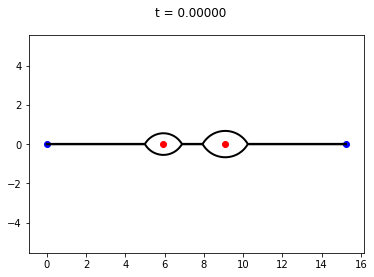

Import successful !


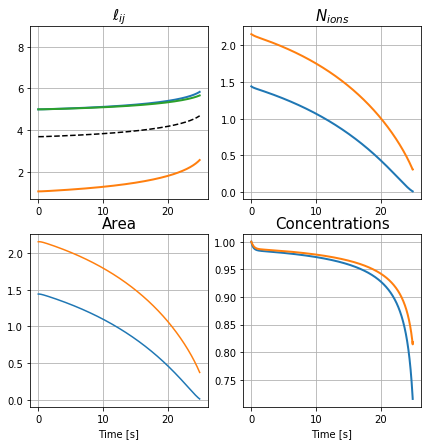

In [2]:
subdir = 'exctinction'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)



In [3]:
L_e = np.loadtxt(os.path.join(main_dir, subdir, 'fluxes_L.dat'))
N_e = np.loadtxt(os.path.join(main_dir, subdir, 'fluxes_N.dat'))

flux_lengths_e = np.zeros((len(L_e)//2, 5))
flux_lengths_e[:, 0] = L_e[::2, 0]
flux_lengths_e[:, 1] = L_e[::2, 2]
flux_lengths_e[:, 2] = L_e[::2, 3]
flux_lengths_e[:, 3] = L_e[1::2, 2]
flux_lengths_e[:, 4] = L_e[1::2, 3]



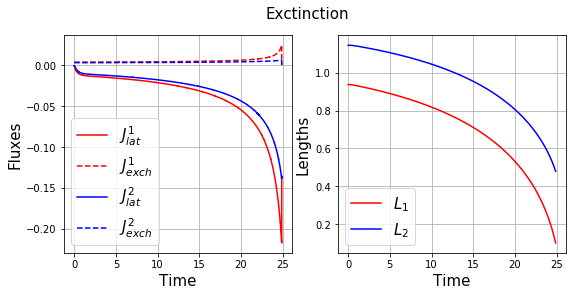

In [4]:
fig_e, ax_e = plt.subplots(1, 2, figsize=(9, 4))

ax_e[0].plot(flux_lengths_e[:, 0], flux_lengths_e[:, 1], label = '$J_{lat}^1$', color = 'r', linestyle='-')
ax_e[0].plot(flux_lengths_e[:, 0], -flux_lengths_e[:, 2], label = '$J_{exch}^1$', color = 'r', linestyle='--')

ax_e[0].plot(flux_lengths_e[:, 0], flux_lengths_e[:, 3], label = '$J_{lat}^2$', color = 'b', linestyle='-')
ax_e[0].plot(flux_lengths_e[:, 0], -flux_lengths_e[:, 4], label = '$J_{exch}^2$', color = 'b', linestyle='--')

ax_e[0].legend(fontsize=15)
ax_e[0].grid()
ax_e[0].set_xlabel('Time', fontsize=15)
ax_e[0].set_ylabel('Fluxes', fontsize=15)

ax_e[1].plot(L[:, 0], L[:, 1], label = r'$L_1$', color = 'r')
ax_e[1].plot(L[:, 0], L[:, 2], label = r'$L_2$', color = 'b')
ax_e[1].legend(fontsize=15)
ax_e[1].grid()
ax_e[1].set_xlabel('Time', fontsize=15)
ax_e[1].set_ylabel('Lengths', fontsize=15)

plt.suptitle('Exctinction', fontsize=15)
plt.show()

======= CHAIN =======
Type         : hydroosmotic
Total length : 15.232234336472796
Current Time : 0
Screening lengths : 
        xi_s = 3.688448745474267
        xi_v = 0.3688448745474267
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : constant
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.04000
Lumen 1 is at position 5.93764 with length 0.93764 and 1.43994 ions with pumping 0.04000
Lumen 2 is at position 9.08643 with length 1.14580 and 2.15024 ions with pumping 0.04000
Lumen -1 is at position 15.23223 with length 0.00000 and 0.00000 ions with pumping 0.04000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 1.06535 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



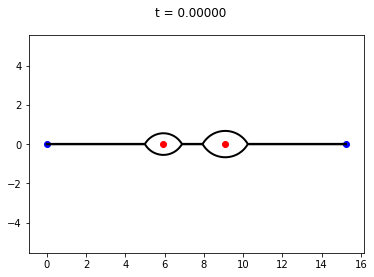

Import successful !


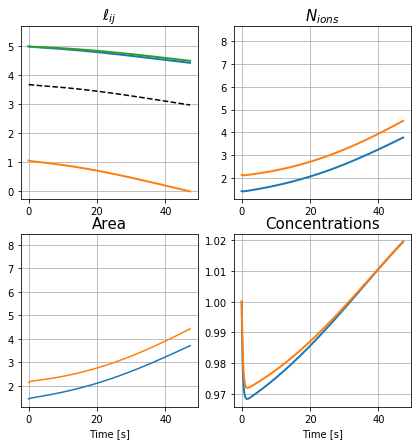

In [5]:
subdir = 'merge'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)




In [6]:
L_m = np.loadtxt(os.path.join(main_dir, subdir, 'fluxes_L.dat'))
N_m = np.loadtxt(os.path.join(main_dir, subdir, 'fluxes_N.dat'))

flux_lengths_m = np.zeros((len(L_m)//2, 5))
flux_lengths_m[:, 0] = L_m[::2, 0]
flux_lengths_m[:, 1] = L_m[::2, 2]
flux_lengths_m[:, 2] = L_m[::2, 3]
flux_lengths_m[:, 3] = L_m[1::2, 2]
flux_lengths_m[:, 4] = L_m[1::2, 3]


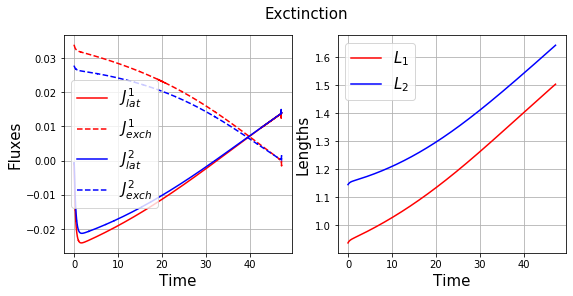

In [7]:
fig_m, ax_m = plt.subplots(1, 2, figsize=(9, 4))

ax_m[0].plot(flux_lengths_m[:, 0], flux_lengths_m[:, 1], label = '$J_{lat}^1$', color = 'r', linestyle='-')
ax_m[0].plot(flux_lengths_m[:, 0], -flux_lengths_m[:, 2], label = '$J_{exch}^1$', color = 'r', linestyle='--')

ax_m[0].plot(flux_lengths_m[:, 0], flux_lengths_m[:, 3], label = '$J_{lat}^2$', color = 'b', linestyle='-')
ax_m[0].plot(flux_lengths_m[:, 0], -flux_lengths_m[:, 4], label = '$J_{exch}^2$', color = 'b', linestyle='--')

ax_m[0].legend(fontsize=15)
ax_m[0].grid()
ax_m[0].set_xlabel('Time', fontsize=15)
ax_m[0].set_ylabel('Fluxes', fontsize=15)

ax_m[1].plot(L[:, 0], L[:, 1], label = r'$L_1$', color = 'r')
ax_m[1].plot(L[:, 0], L[:, 2], label = r'$L_2$', color = 'b')
ax_m[1].legend(fontsize=15)
ax_m[1].grid()
ax_m[1].set_xlabel('Time', fontsize=15)
ax_m[1].set_ylabel('Lengths', fontsize=15)

plt.suptitle('Exctinction', fontsize=15)
plt.show()